In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from meteostat import Point, Daily
from datetime import datetime
from geopy.geocoders import Nominatim
from sklearn.preprocessing import OneHotEncoder

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline

In [5]:
pd.set_option('display.max_columns', None)

In [3]:
pd.reset_option('display.max_columns')

In [6]:
df1 = pd.read_csv('Moscow_data_2023_utf.csv', skiprows=6, on_bad_lines='skip', sep=';')
df1.head()

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,N,WW,W1,W2,Tn,Tx,Cl,Nh,H,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
31.05.2023 21:00,10.5,745.9,759.4,-0.1,83,"Штиль, безветрие",0,NaN,NaN,40%.,Облака в целом рассеиваются или становятся мен...,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,12.1,"Слоисто-кучевых, слоистых, кучевых или кучево-...",40%.,"2500 или более, или облаков нет.","Высококучевые просвечивающие, расположенные на...","Перистых, перисто-кучевых или перисто-слоистых...",20.0,7.7,3.0,12.0,NaN,NaN,NaN,NaN,NaN
31.05.2023 18:00,11.8,746.0,759.4,-0.6,77,"Ветер, дующий с западо-северо-запада",1,NaN,NaN,"90 или более, но не 100%",Ливневый(ые) дождь(и).,Облака покрывали более половины неба в течение...,Облака покрывали более половины неба в течение...,NaN,NaN,"Слоисто-кучевые, образовавшиеся из кучевых.","90 или более, но не 100%",1500-2000,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",19.0,7.8,3.0,12.0,NaN,NaN,NaN,NaN,NaN
31.05.2023 15:00,10.5,746.6,760.1,0.4,76,"Ветер, дующий с северо-запада",2,NaN,NaN,100%.,Состояние неба в общем не изменилось.,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,NaN,Кучевые и слоисто-кучевые (но не слоисто-кучев...,100%.,600-1000,NaN,NaN,20.0,6.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31.05.2023 12:00,10.9,746.2,759.7,-0.3,86,"Ветер, дующий с северо-запада",2,NaN,NaN,100%.,Состояние неба в общем не изменилось.,Ливень (ливни).,Облака покрывали более половины неба в течение...,NaN,NaN,Кучевые и слоисто-кучевые (но не слоисто-кучев...,100%.,300-600,NaN,NaN,20.0,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31.05.2023 09:00,11.4,746.5,759.9,0.1,87,"Ветер, дующий с северо-запада",1,NaN,NaN,100%.,Ливневый(ые) дождь(и) слабый(ые) в срок наблюд...,Ливень (ливни).,Облака покрывали более половины неба в течение...,11.1,NaN,Кучево-дождевые волокнистые (часто с наковальн...,100%.,300-600,NaN,NaN,20.0,9.3,Осадков нет,12.0,Поверхность почвы влажная.,12.0,NaN,NaN,NaN


In [7]:
columns = df1.columns.to_list()
columns.remove('Местное время в Москве (ВДНХ)')
df1.columns = columns + [None]
del df1[None]

In [8]:
df1.reset_index(inplace=True)

In [9]:
df1['index'] = pd.to_datetime(df1['index'], format='%d.%m.%Y %H:%M')
df1 = df1[df1['index'].dt.time == pd.to_datetime('15:00').time()]
df1['index'] = df1['index'].dt.date
df1.set_index('index', inplace=True)
df1.index.name = None

In [10]:
df1 = df1.drop(['T','Pa','ff10','ff3','WW','W1','W2','Tn','Tx','Cl','Ch','tR','E','Td','RRR','Tg',"E'",'sss','Cm','Nh','Ff'], axis=1)
df1 = df1.iloc[::-1]

In [11]:
df1.head()

,Po,P,U,DD,N,H,VV
2023-03-01,744.3,758.5,57,"Ветер, дующий с запада",60%.,1000-1500,20.0
2023-03-02,742.8,756.9,63,"Ветер, дующий с запада","90 или более, но не 100%",600-1000,20.0
2023-03-03,737.2,751.0,81,"Ветер, дующий с запада","90 или более, но не 100%",300-600,18.0
2023-03-04,730.0,743.7,81,"Ветер, дующий с юго-юго-востока",100%.,300-600,9.0
2023-03-05,730.6,744.5,80,"Ветер, дующий с западо-северо-запада",100%.,300-600,20.0


In [12]:
# Функция для получения координат города
def get_city_coordinates(city_name):
    geolocator = Nominatim(user_agent="weather_data_fetcher")
    location = geolocator.geocode(city_name)
    return location.latitude, location.longitude

city_name = "Moscow"
latitude, longitude = get_city_coordinates(city_name)

# start = datetime(2005, 2, 1)
# end = datetime(2024, 5, 26)
start = datetime(2023, 3, 1)
end = datetime(2024, 5, 31)


location = Point(latitude, longitude)

df2 = Daily(location, start, end)
df2 = df2.fetch()

df2.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2023-03-01,-4.1,-6.3,-2.1,0.1,NaN,294.0,6.9,NaN,1010.3,NaN
2023-03-02,-2.8,-4.6,-0.8,1.6,NaN,284.0,5.8,NaN,1009.0,NaN
2023-03-03,-0.2,-1.4,1.1,0.9,NaN,264.0,5.0,NaN,1001.8,NaN
2023-03-04,-1.1,-2.9,0.5,2.4,NaN,204.0,3.7,NaN,994.7,NaN
2023-03-05,-1.8,-3.4,-0.4,2.3,NaN,273.0,4.5,NaN,991.0,NaN


In [13]:
df2.reset_index(inplace=True)
df2['time'] = pd.to_datetime(df2['time'], format='%d.%m.%Y %H:%M')
df2['time'] = df2['time'].dt.date
df2.set_index('time', inplace=True)
df2.index.name = None

In [14]:
df2 = df2.drop(list(set(df2.index) - set(df1.index) & set(df2.index)))

In [15]:
df2 = df2.drop(['snow', 'wpgt', 'tsun', 'pres', 'wdir'], axis=1)

In [16]:
df2.head()

,tavg,tmin,tmax,prcp,wspd
2023-03-01,-4.1,-6.3,-2.1,0.1,6.9
2023-03-02,-2.8,-4.6,-0.8,1.6,5.8
2023-03-03,-0.2,-1.4,1.1,0.9,5.0
2023-03-04,-1.1,-2.9,0.5,2.4,3.7
2023-03-05,-1.8,-3.4,-0.4,2.3,4.5


In [17]:
dataset = pd.concat([df1, df2], axis=1)
dataset = dataset[['tavg','tmin','tmax','Po','P','U','prcp','DD','wspd','N','H','VV']]

# Убираем пропуски
dataset['tavg'] = dataset['tavg'].fillna(dataset['tmin'] + dataset['tmax'])
dataset['Po'] = dataset['Po'].ffill()
dataset['P'] = dataset['P'].ffill()
dataset['prcp'] = dataset['prcp'].ffill()
dataset['wspd'] = dataset['wspd'].ffill()
dataset['N'] = dataset['N'].ffill()
dataset['H'] = dataset['H'].ffill()
dataset['VV'] = dataset['VV'].ffill()

In [18]:
# dataset.columns = ['t_avg', 't_min', 't_max', 'Po', 'P', 'relative_humidity', 'daily_precipitation_mm', 'Direction_wind', 'wind_speed', 'cloudy', 'cloud_height', 'visibility_range']
dataset.columns = ['Средняя T', 'Минимальная T', 'Максимальная T', 'Po', 'P', 'Относительная влажность', 'Сумма осадков за сутки в мм', 'Направление ветра', 'Скорость ветра', 'Облачность', 'Высота облаков', 'Дальность видимости']

In [19]:
dataset.head()

,Средняя T,Минимальная T,Максимальная T,Po,P,Относительная влажность,Сумма осадков за сутки в мм,Направление ветра,Скорость ветра,Облачность,Высота облаков,Дальность видимости
2023-03-01,-4.1,-6.3,-2.1,744.3,758.5,57,0.1,"Ветер, дующий с запада",6.9,60%.,1000-1500,20.0
2023-03-02,-2.8,-4.6,-0.8,742.8,756.9,63,1.6,"Ветер, дующий с запада",5.8,"90 или более, но не 100%",600-1000,20.0
2023-03-03,-0.2,-1.4,1.1,737.2,751.0,81,0.9,"Ветер, дующий с запада",5.0,"90 или более, но не 100%",300-600,18.0
2023-03-04,-1.1,-2.9,0.5,730.0,743.7,81,2.4,"Ветер, дующий с юго-юго-востока",3.7,100%.,300-600,9.0
2023-03-05,-1.8,-3.4,-0.4,730.6,744.5,80,2.3,"Ветер, дующий с западо-северо-запада",4.5,100%.,300-600,20.0


In [20]:
replacement_dict_1 = {
    '60%.': 0.6,
    '90  или более, но не 100%': 0.9,
    '100%.': 1,
    '70 – 80%.': 0.75,
    'Облаков нет.': 0,
    '50%.': 0.5,
    '20–30%.' : 0.25,
    '40%.' : 0.4,
    '10%  или менее, но не 0' : 0.1
}

# Замена значений
dataset['Облачность'] = dataset['Облачность'].replace(replacement_dict_1)

In [21]:
replacement_dict_2 = {
    '1000-1500': 1250,
    '600-1000': 800,
    '300-600': 450,
    '2500 или более, или облаков нет.': 2750,
    '200-300': 250,
    '2000-2500': 2250
}

# Замена значений
dataset['Высота облаков'] = dataset['Высота облаков'].replace(replacement_dict_2)

In [22]:
encoder = OneHotEncoder(sparse=False)

onehot_columns = encoder.fit_transform(dataset[['Направление ветра']])
one_hot_df = pd.DataFrame(onehot_columns, columns=encoder.get_feature_names_out(['Направление ветра']))
one_hot_df.index = dataset.index

dataset = pd.concat([dataset, one_hot_df], axis=1)
dataset.drop('Направление ветра', axis=1, inplace=True)


In [23]:
dataset

,Средняя T,Минимальная T,Максимальная T,Po,P,Относительная влажность,Сумма осадков за сутки в мм,Скорость ветра,Облачность,Высота облаков,Дальность видимости,"Направление ветра_Ветер, дующий с востока","Направление ветра_Ветер, дующий с востоко-северо-востока","Направление ветра_Ветер, дующий с востоко-юго-востока","Направление ветра_Ветер, дующий с запада","Направление ветра_Ветер, дующий с западо-северо-запада","Направление ветра_Ветер, дующий с западо-юго-запада","Направление ветра_Ветер, дующий с севера","Направление ветра_Ветер, дующий с северо-востока","Направление ветра_Ветер, дующий с северо-запада","Направление ветра_Ветер, дующий с северо-северо-востока","Направление ветра_Ветер, дующий с северо-северо-запада","Направление ветра_Ветер, дующий с юга","Направление ветра_Ветер, дующий с юго-востока","Направление ветра_Ветер, дующий с юго-запада","Направление ветра_Ветер, дующий с юго-юго-востока","Направление ветра_Ветер, дующий с юго-юго-запада","Направление ветра_Штиль, безветрие"
2023-03-01,-4.1,-6.3,-2.1,744.3,758.5,57,0.1,6.9,0.60,1250,20.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-03-02,-2.8,-4.6,-0.8,742.8,756.9,63,1.6,5.8,0.90,800,20.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-03-03,-0.2,-1.4,1.1,737.2,751.0,81,0.9,5.0,0.90,450,18.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-03-04,-1.1,-2.9,0.5,730.0,743.7,81,2.4,3.7,1.00,450,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2023-03-05,-1.8,-3.4,-0.4,730.6,744.5,80,2.3,4.5,1.00,450,20.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-27,17.3,13.2,20.8,748.1,761.2,35,0.0,6.1,0.25,1250,20.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-05-28,12.4,9.5,16.3,749.3,762.7,49,2.0,7.1,0.90,800,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-05-29,15.5,8.8,20.9,751.0,764.2,29,0.0,2.0,0.00,800,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2023-05-30,16.9,9.9,22.1,748.3,761.4,30,0.0,1.1,0.75,800,20.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

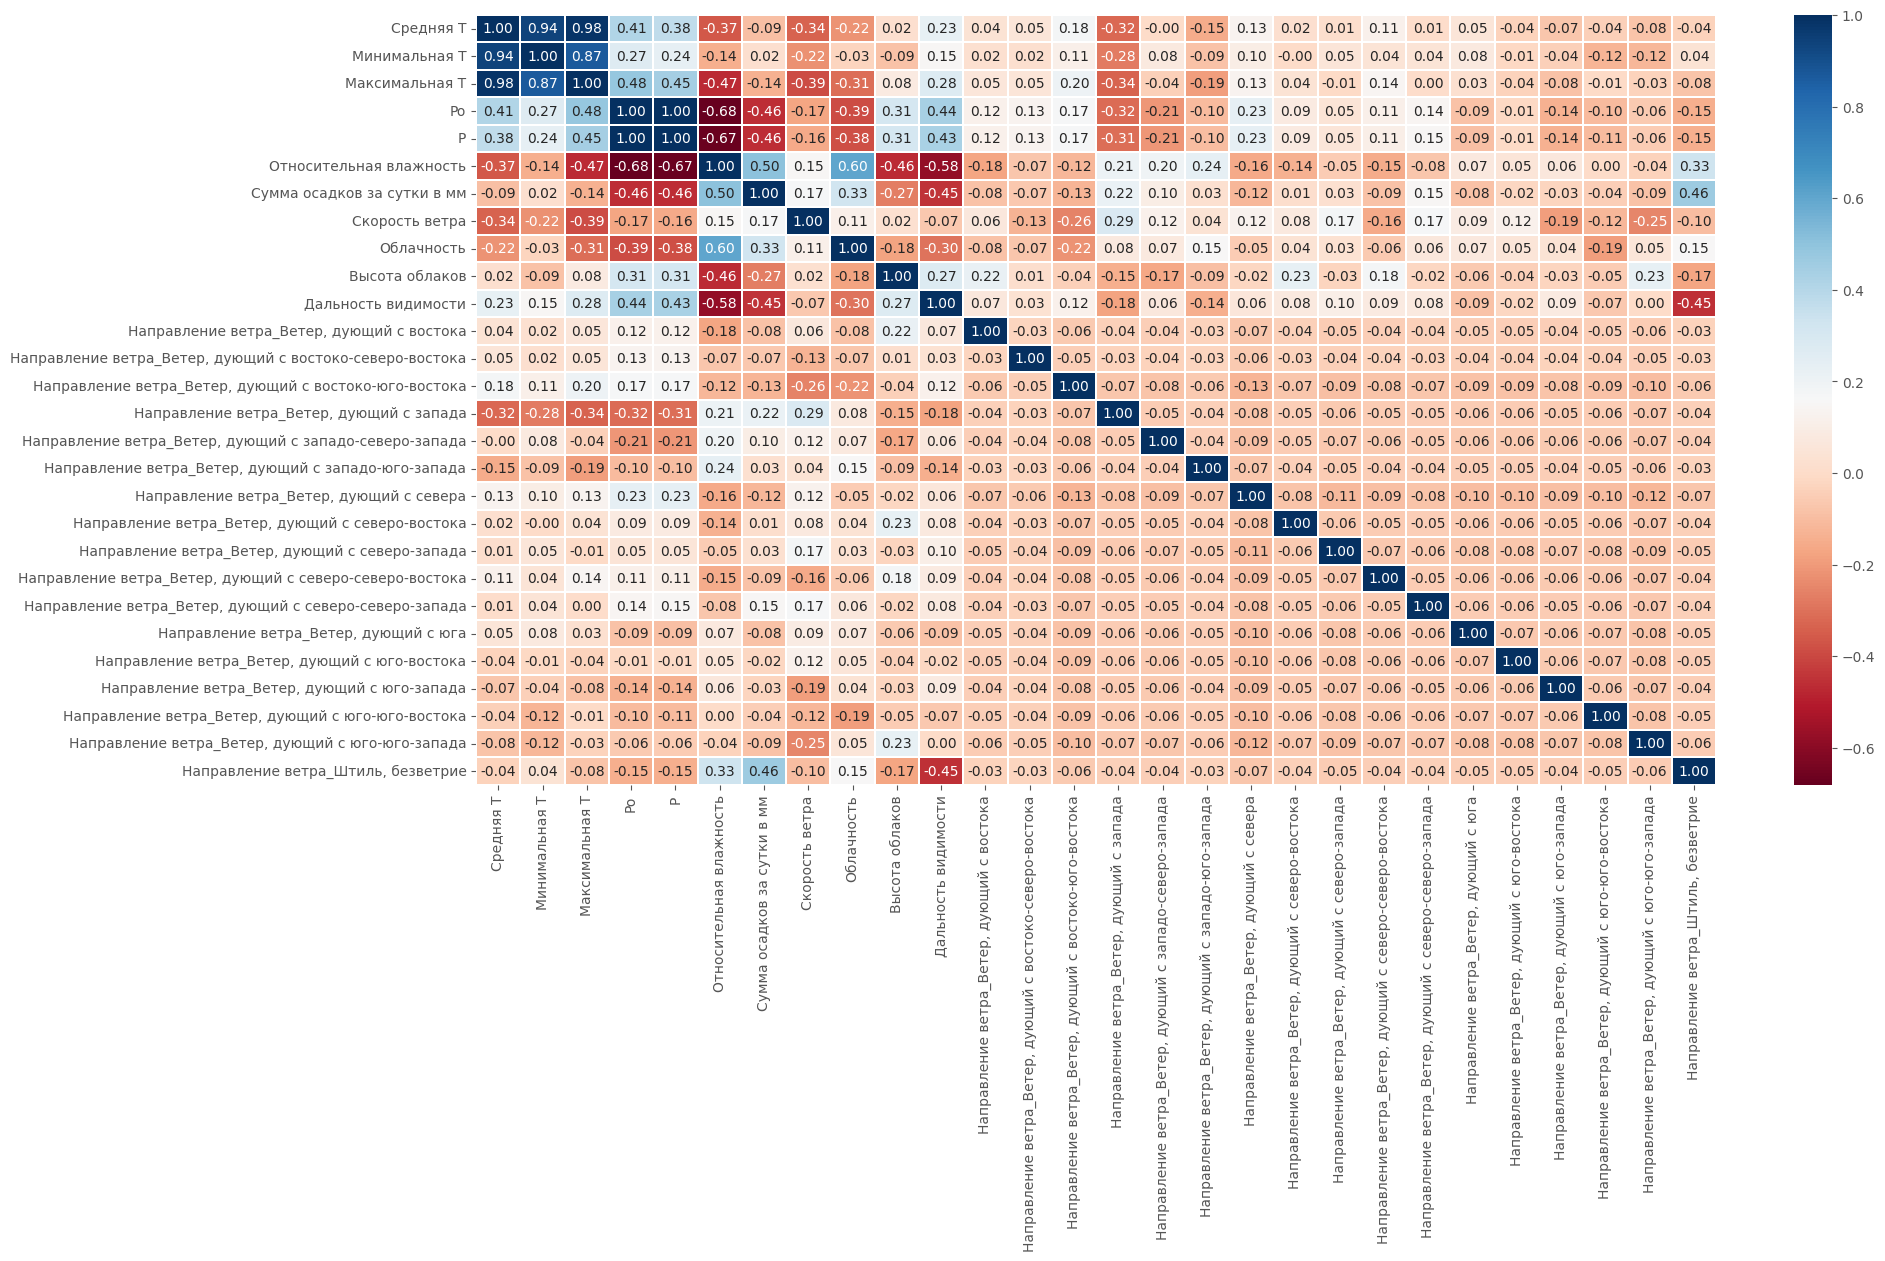

In [24]:
fig, ax = plt.subplots(figsize=(20, 10), dpi = 100)
sns.heatmap(dataset.corr(method='pearson'), linewidths= .3, annot=True, fmt=".2f", cmap= 'RdBu')